In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys

sys.path.insert(0, '../src')

# Set the working directory to the root of the project
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')


Current working directory: /home/jprodanov/resource-elastisity-nancy


In [2]:

algorithms = ['thold', 'dqn', 'ppo', 'ddpg']
mean_crec_alg = pickle.load(open('results/generated/load/monte_carlo_22/mean_crec_alg.p', 'rb'))
mean_rts_alg = pickle.load(open('results/generated/load/monte_carlo_22/mean_rts_alg.p', 'rb'))

deltas_0 = pickle.load(open('results/generated/load/monte_carlo_22/deltas_0.p', 'rb'))
deltas_1 = pickle.load(open('results/generated/load/monte_carlo_22/deltas_1.p', 'rb'))
deltas_2 = pickle.load(open('results/generated/load/monte_carlo_22/deltas_2.p', 'rb'))

all_response_times = pickle.load(open('results/generated/load/monte_carlo_22/all_response_times.p', 'rb'))


In [2]:

algorithms = ['fivedqn', 'elevendqn', 'ippo', 'iddpg']
folder = 'results/experiment_j/load_testing_200ep/monte_carlo_10'
mean_crec_alg = pickle.load(open(f'{folder}/mean_crec_alg.p', 'rb'))
mean_rts_alg = pickle.load(open(f'{folder}/mean_rts_alg.p', 'rb'))

deltas_0 = pickle.load(open(f'{folder}/deltas_0.p', 'rb'))
deltas_1 = pickle.load(open(f'{folder}/deltas_1.p', 'rb'))
deltas_2 = pickle.load(open(f'{folder}/deltas_2.p', 'rb'))

all_response_times = pickle.load(open(f'{folder}/all_response_times.p', 'rb'))


In [3]:
for alg in algorithms:
    print(f"\nALG {alg} has mean of {np.mean(np.array(list(mean_rts_alg[str(alg)].values())).flatten())}s "
          f"response times")
    print(f"Service 1 average delta {np.mean(deltas_0[alg])}")
    print(f"Service 2 average delta {np.mean(deltas_1[alg])}")
    print(f"Service 3 average delta {np.mean(deltas_2[alg])}")



ALG fivedqn has mean of 0.20570690324999996s response times
Service 1 average delta 540.0
Service 2 average delta 1040.0
Service 3 average delta 820.0

ALG elevendqn has mean of 0.2664392326944444s response times
Service 1 average delta 4165.0
Service 2 average delta 3040.0
Service 3 average delta 3740.0

ALG ippo has mean of 0.7022182315555554s response times
Service 1 average delta 0.0
Service 2 average delta 37.5531468629837
Service 3 average delta 0.0

ALG iddpg has mean of 1.2255998123333331s response times
Service 1 average delta 100.0
Service 2 average delta 0.0
Service 3 average delta 0.0


In [36]:
baseline_mean = np.mean(np.array(list(mean_rts_alg['thold'].values())).flatten())
for alg in mean_rts_alg:
    if alg == 'thold':
        continue
    alg_mean = np.mean(np.array(list(mean_rts_alg[alg].values())).flatten())
    improvement = ((baseline_mean - alg_mean) / baseline_mean) * 100
    print(f"ALG {alg} has mean of {alg_mean:.2f}s response times")
    print(f"Percentage improvement over baseline: {improvement:.2f}%")

ALG dqn has mean of 0.18s response times
Percentage improvement over baseline: 0.49%
ALG ppo has mean of 0.16s response times
Percentage improvement over baseline: 15.41%
ALG ddpg has mean of 0.11s response times
Percentage improvement over baseline: 40.12%


In [4]:
for alg in algorithms:
    print(f"\nALG {alg} ")
    for service in range(1, 3 + 1):
        rts = all_response_times[alg][service]
        above025 = (np.sum(np.array(rts) > 0.25) / len(rts)) * 100
        print(f" {above025:.2f}% of response times more than 0.25s for service {service}")


ALG fivedqn 
 49.70% of response times more than 0.25s for service 1
 37.94% of response times more than 0.25s for service 2
 16.21% of response times more than 0.25s for service 3

ALG elevendqn 
 57.11% of response times more than 0.25s for service 1
 64.83% of response times more than 0.25s for service 2
 6.59% of response times more than 0.25s for service 3

ALG ippo 
 82.12% of response times more than 0.25s for service 1
 65.38% of response times more than 0.25s for service 2
 34.86% of response times more than 0.25s for service 3

ALG iddpg 
 17.58% of response times more than 0.25s for service 1
 61.85% of response times more than 0.25s for service 2
 10.78% of response times more than 0.25s for service 3


In [35]:
def calculate_changes(data, service_index):
    cpu_limits = [entry[service_index][0] for entry in data]
    return np.sum(np.abs(np.diff(cpu_limits)))

for alg in algorithms:
    print(alg)
    for service_index in range(3):
        changes = calculate_changes(mean_crec_alg[alg], service_index)
        print(f"Change in CPU limits for service {service_index + 1}: {changes:.2f}")

thold
Change in CPU limits for service 1: 192.05
Change in CPU limits for service 2: 270.45
Change in CPU limits for service 3: 397.73
dqn
Change in CPU limits for service 1: 384.09
Change in CPU limits for service 2: 439.77
Change in CPU limits for service 3: 511.36
ppo
Change in CPU limits for service 1: 433.50
Change in CPU limits for service 2: 536.05
Change in CPU limits for service 3: 608.27
ddpg
Change in CPU limits for service 1: 430.23
Change in CPU limits for service 2: 477.77
Change in CPU limits for service 3: 562.95


In [4]:
for alg in algorithms:
    for service in range(3):
        print(f"{alg}")
        # cpu_percentages = [entry[service][2] for entry in mean_crec_alg[alg]]
        # print(f" mean of {np.mean(cpu_percentages):.2f}% CPU usage for service {service}")

        # cpu_limits = [entry[service][0] for entry in mean_crec_alg[alg]]
        # share = np.mean(cpu_limits)/10 # Max is 1000, and we need percentage
        # print(f" mean of {share:.2f}% CPU shares for service {service}")
        

        mean_rts = mean_rts_alg[alg][service + 1]
        # mean_rts = all_response_times[alg][service + 1]
        print(f" mean of {np.mean(mean_rts):.2f}s response times for service {service} ")

        above025 = (np.sum(np.array(all_response_times[alg][service + 1]) > 0.25) / 
                    len(all_response_times[alg][service + 1])) * 100
        print(f" {above025:.2f}% of response times more than 0.25s for service {service}")

        match service:
            case 0:
                deltas = deltas_0[alg]
            case 1:
                deltas = deltas_1[alg]
            case 2:
                deltas = deltas_2[alg]
        print(f" mean of {np.mean(deltas):.2f}s delta for service {service}")

        print()


fivedqn
 mean of 0.07s response times for service 0 
 5.58% of response times more than 0.25s for service 0
 mean of 540.00s delta for service 0

fivedqn
 mean of 0.35s response times for service 1 
 17.59% of response times more than 0.25s for service 1
 mean of 1040.00s delta for service 1

fivedqn
 mean of 0.20s response times for service 2 
 11.57% of response times more than 0.25s for service 2
 mean of 820.00s delta for service 2

elevendqn
 mean of 0.46s response times for service 0 
 44.06% of response times more than 0.25s for service 0
 mean of 4165.00s delta for service 0

elevendqn
 mean of 0.23s response times for service 1 
 19.96% of response times more than 0.25s for service 1
 mean of 3040.00s delta for service 1

elevendqn
 mean of 0.11s response times for service 2 
 9.86% of response times more than 0.25s for service 2
 mean of 3740.00s delta for service 2

ippo
 mean of 0.99s response times for service 0 
 81.03% of response times more than 0.25s for service 0
 mea

In [3]:
from matplotlib import rc
from matplotlib.ticker import FuncFormatter

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

In [69]:
rts_ylimits = 2.0
crec_ylimits = 500

for idx, algorithm in enumerate(algorithms):
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    # Plus one to sync
    third_way_point = len(time_axis) // 3 + 1
    two_third_way_point = 2 * len(time_axis) // 3 + 1

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.6, 3.6), dpi=300)
    # fig, ax1 = plt.subplots(figsize=(7, 4), dpi=300)

    ### Plot 1: Mean Response Times ###
    for api_id, rts in response_times.items():
        ax1.plot(time_axis, rts, label=f'Service {api_id}')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    # if algorithm == 'thold':
    #     ax1.set_title(f'Heuristic - Mean Response Time', fontsize=14)
    # else:
    #     ax1.set_title(f'{algorithm.upper()} - Mean Response Time', fontsize=14)
    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(third_way_point, color='gray', linestyle='--')
    ax1.axvline(two_third_way_point, color='gray', linestyle='--')
    ax1.text(third_way_point + 0.5, 1, 'Load Change', color='black', fontsize=10)
    ax1.text(two_third_way_point + 0.5, 1, 'Load Change', color='black', fontsize=10)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 5 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels
    
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    # fig, ax2 = plt.subplots(figsize=(7, 4), dpi=300)
    ### Plot 2: CPU Allocations and Utilizations ###
    hatches = ['//', '\\\\', 'xx']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis) + 0.25 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.25, label=f'Service {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.25, label=f'Service {service_idx + 1} Usage')

    # Adding indicators at each third of the process
    ax2.axvline(third_way_point, color='gray', linestyle='--')
    ax2.axvline(two_third_way_point, color='gray', linestyle='--')
    ax2.text(third_way_point + 0.5, 425, 'Load Change', color='black', fontsize=10)
    ax2.text(two_third_way_point + 0.5, 425, 'Load Change', color='black', fontsize=10)

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    # if algorithm == 'thold':
    #     ax2.set_title(f'Heuristic - CPU Allocations and Utilizations', fontsize=14)
    # else:
    #     ax2.set_title(f'{algorithm.upper()} - CPU Allocations and Utilizations', fontsize=14)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_ylim(0, crec_ylimits)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 5 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    plt.savefig(f'figures/loadtesting_combined/{algorithm}.pdf')
    # plt.show()
    plt.close()


In [74]:
import matplotlib.pyplot as plt
import numpy as np

rts_ylimits = 2.0
crec_ylimits = 500

# Define the algorithms
algorithms = ['thold', 'dqn', 'ppo', 'ddpg']

for algorithm in algorithms:
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    # Plus one to sync
    third_way_point = len(time_axis) // 3 + 1
    two_third_way_point = 2 * len(time_axis) // 3 + 1

    ### Plot 1: Mean Response Times ###
    fig, ax1 = plt.subplots(figsize=(4.8, 3.6), dpi=300)

    for api_id, rts in response_times.items():
        ax1.plot(time_axis, rts, label=f'Service {api_id}')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    # if algorithm == 'thold':
    #     ax1.set_title(f'Heuristic - Mean Response Time', fontsize=14)
    # else:
    #     ax1.set_title(f'{algorithm.upper()} - Mean Response Time', fontsize=14)
    ax1.legend(loc='upper left', fontsize=11)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(third_way_point, color='gray', linestyle='--')
    ax1.axvline(two_third_way_point, color='gray', linestyle='--')
    ax1.text(third_way_point + 0.5, 1.75, 'Load Change', color='black', fontsize=12)
    ax1.text(two_third_way_point + 0.5, 1.75, 'Load Change', color='black', fontsize=12)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    # plt.savefig(f'figures/loadtesting/{algorithm}_response_times.pdf')
    # plt.show()
    plt.close(fig)

    ### Plot 2: CPU Allocations and Utilizations ###
    fig, ax2 = plt.subplots(figsize=(4.8, 3.6), dpi=300)
    hatches = ['//', '\\\\', 'xx']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis) + 0.25 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.25, label=f'Service {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.25, label=f'Service {service_idx + 1} Usage')

    # Adding indicators at each third of the process
    ax2.axvline(third_way_point, color='gray', linestyle='--')
    ax2.axvline(two_third_way_point, color='gray', linestyle='--')
    ax2.text(third_way_point + 0.5, 450, 'Load Change', color='black', fontsize=12)
    ax2.text(two_third_way_point + 0.5, 450, 'Load Change', color='black', fontsize=12)

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    # if algorithm == 'thold':
    #     ax2.set_title(f'Heuristic - CPU Allocations and Utilizations', fontsize=14)
    # else:
    #     ax2.set_title(f'{algorithm.upper()} - CPU Allocations and Utilizations', fontsize=14)
    ax2.legend(loc='upper left', fontsize=11)
    ax2.set_ylim(0, crec_ylimits)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels


    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    plt.tight_layout()
    # plt.savefig(f'figures/loadtesting/{algorithm}_utilizations.pdf', bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)

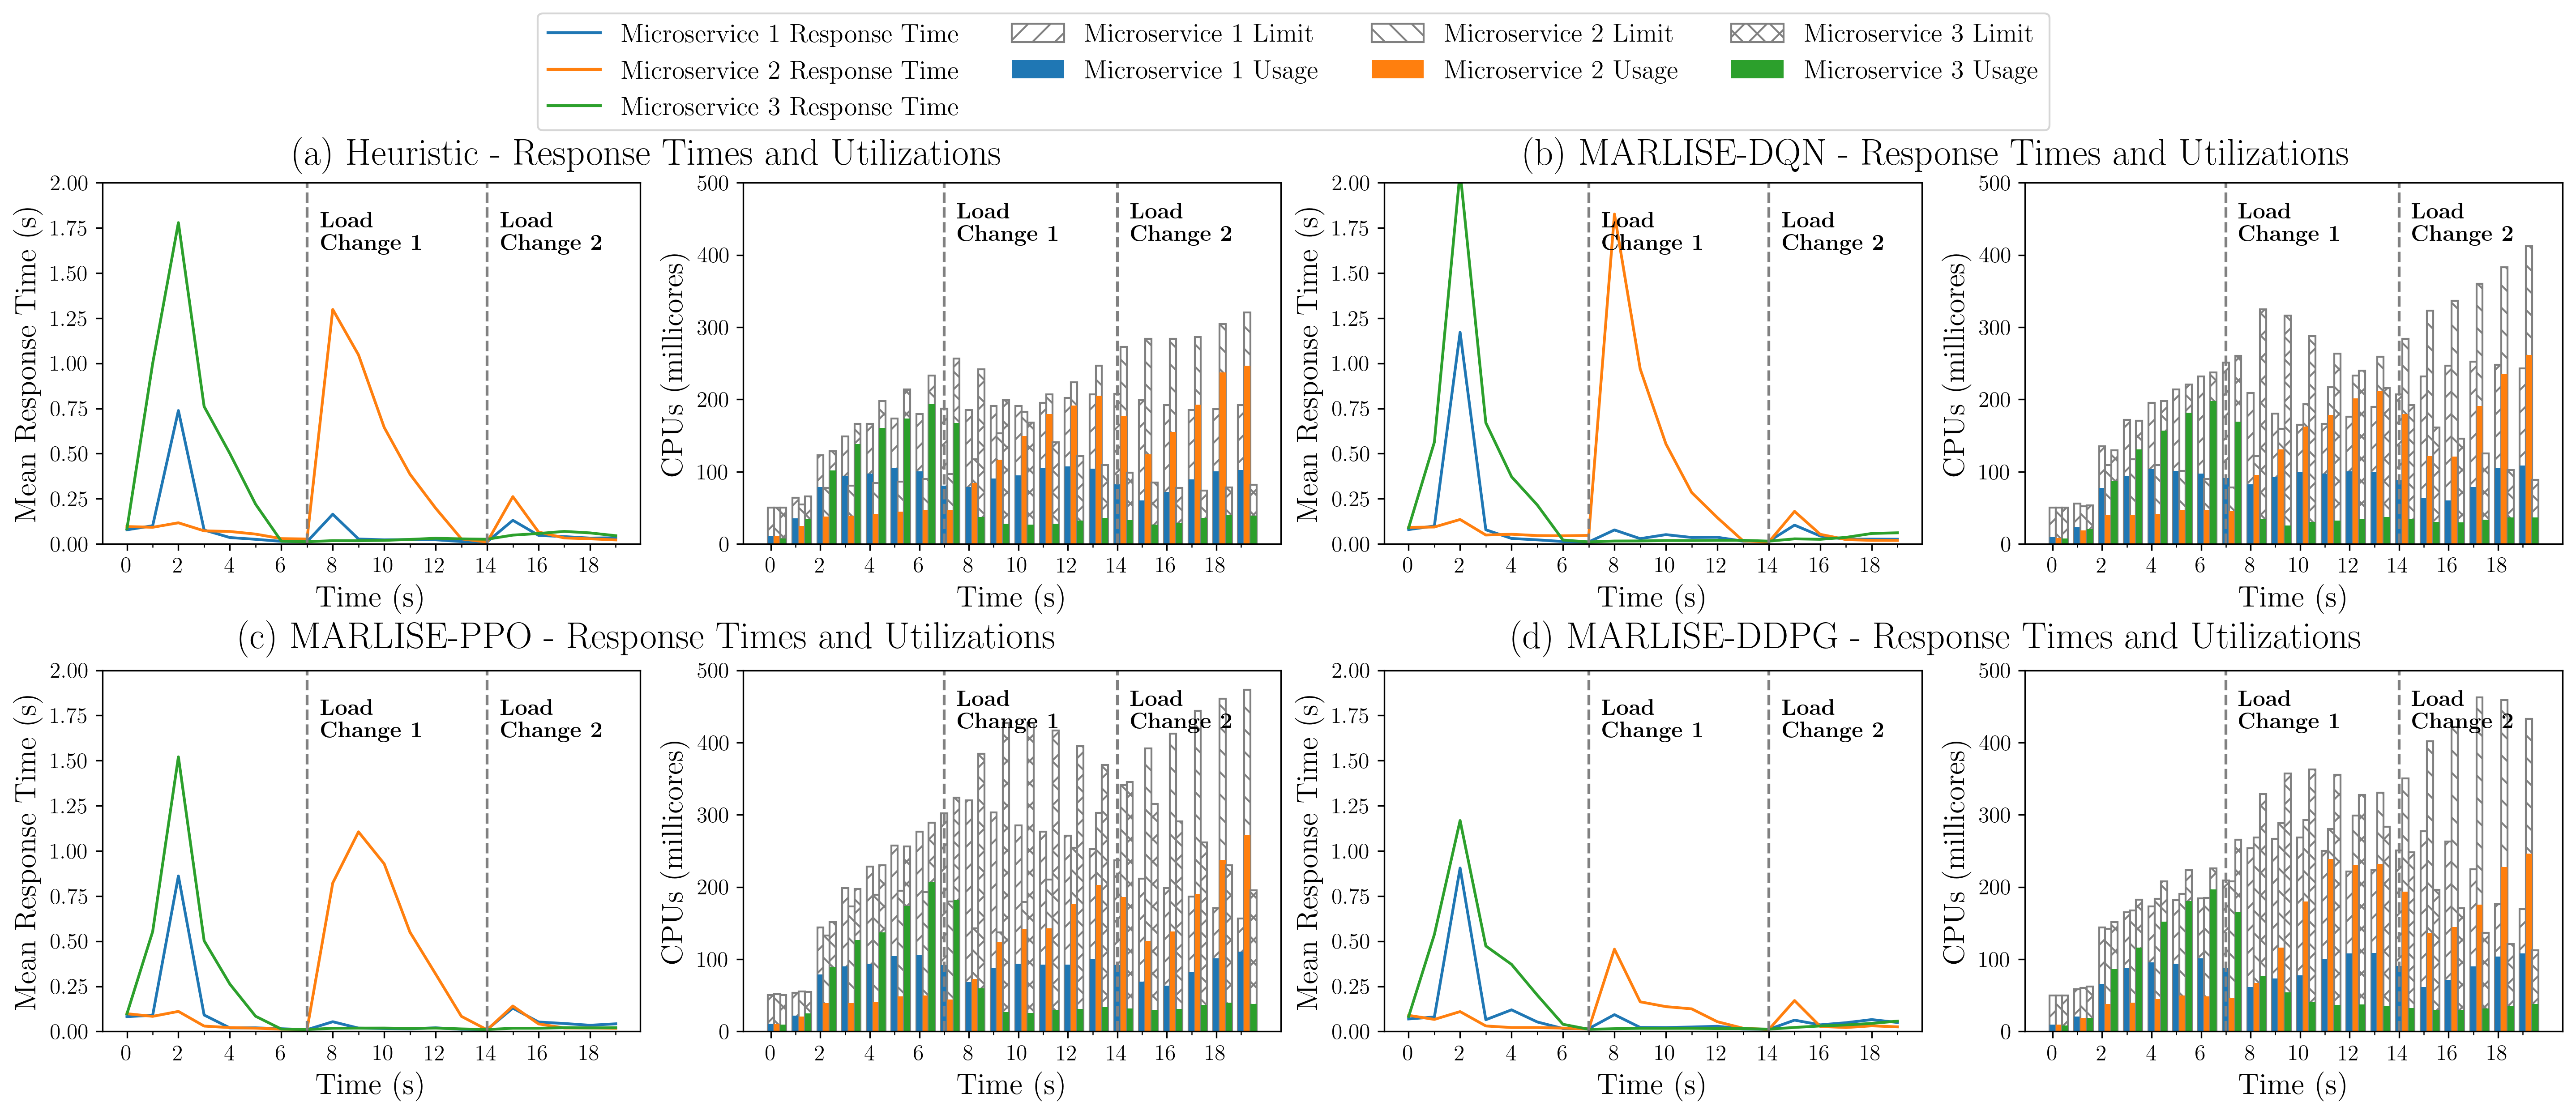

In [10]:

rts_ylimits = 2
crec_ylimits = 500

fig, axs = plt.subplots(2, 4, figsize=(19.2, 7.2), dpi=300)  # Create a 2x4 grid of subplots

labels = ['a', 'b', 'c', 'd']

for idx, algorithm in enumerate(algorithms):
    response_times = mean_rts_alg[algorithm]
    container_recordings = mean_crec_alg[algorithm]
    time_axis = np.arange(len(container_recordings), dtype=int)
    
    # Plus one to sync
    third_way_point = len(time_axis) // 3 + 1
    two_third_way_point = 2 * len(time_axis) // 3 + 1

    row, col = divmod(idx, 2)

    ### Plot 1: Mean Response Times ###
    ax1 = axs[row, col * 2]
    for api_id, rts in response_times.items():
        ax1.plot(time_axis, rts, label=f'Microservice {api_id} Response Time')

    ax1.set_xlabel('Time (s)', fontsize=16)
    ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
    ax1.set_ylim(0, rts_ylimits)

    # Adding indicators at each third of the process
    ax1.axvline(third_way_point, color='gray', linestyle='--')
    ax1.axvline(two_third_way_point, color='gray', linestyle='--')
    ax1.text(third_way_point + 0.5, 1.75, r'\noindent\textbf{Load \\ Change 1}', color='black', fontsize=12)
    ax1.text(two_third_way_point + 0.5, 1.75, r'\noindent\textbf{Load \\ Change 2}', color='black', fontsize=12)

    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax1.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=10)

    # Add label to the subplot
    # if algorithm == 'thold':
    #     fig.text(-0.1, 1.1, f'({labels[idx]}) Heuristic - Response Times and Utilizations', transform=ax1.transAxes, size=20, weight='bold')
    # else:
    #     fig.text(-0.1, 1.1, f'({labels[idx]}) {algorithm.upper()} - Response Times and Utilizations', transform=ax1.transAxes, size=20, weight='bold')

    ### Plot 2: CPU Allocations and Utilizations ###
    ax2 = axs[row, col * 2 + 1]
    hatches = ['//', '\\\\', 'xx']  # Different hatching patterns
    for service_idx, container_recording in enumerate(zip(*container_recordings)):
        cpu_limits, cpu_usages, cpu_percentages = zip(*container_recording)

        # Shift bars slightly to avoid overlap
        x_pos = np.array(time_axis) + 0.25 * service_idx
        ax2.bar(x_pos, cpu_limits, width=0.25, label=f'Microservice {service_idx + 1} Limit',
                color='white', edgecolor='gray', hatch=hatches[service_idx])
        ax2.bar(x_pos, cpu_usages, width=0.25, label=f'Microservice {service_idx + 1} Usage')

    ax2.set_xlabel('Time (s)', fontsize=16)
    ax2.set_ylabel('CPUs (millicores)', fontsize=16)
    ax2.set_ylim(0, crec_ylimits)

    # Adding indicators at each third of the process
    ax2.axvline(third_way_point, color='gray', linestyle='--')
    ax2.axvline(two_third_way_point, color='gray', linestyle='--')
    ax2.text(third_way_point + 0.5, 450, r'\noindent\textbf{Load \\ Change 1}', color='black', fontsize=12)
    ax2.text(two_third_way_point + 0.5, 450, r'\noindent\textbf{Load \\ Change 2}', color='black', fontsize=12)

    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 1), minor=True)  # Tick every 1 unit
    ax2.set_xticks(np.arange(min(time_axis), max(time_axis) + 1, 2))  # Tick every 2 units
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels

    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.tick_params(axis='both', which='minor', labelsize=10)

    # Add label to the subplot
    # ax2.text(-0.1, 1.1, f'({labels[idx]})', transform=ax2.transAxes, size=20, weight='bold')

    if algorithm == 'thold':
        fig.text(0.25 + (col * 0.5), 1 - (row * 0.5) - 0.01, f'({labels[idx]}) Heuristic - Response Times and Utilizations', 
                 ha='center', size=20, weight='bold')
    else:
        fig.text(0.25 + (col * 0.5), 1 - (row * 0.5) - 0.01, f'({labels[idx]}) {"MARLISE-" + algorithm.upper()} - Response Times and Utilizations', 
                 ha='center', size=20, weight='bold')

# Create custom legend entries
# custom_legend = [Patch(facecolor='white', edgecolor='gray', hatch='//', label='CPU Limits')]
ax1handles, ax1labels = ax1.get_legend_handles_labels()
ax2handles, ax2labels = ax2.get_legend_handles_labels()
fig.legend(handles=ax1handles + ax2handles, labels=ax1labels + ax2labels, loc='upper center', fontsize=14, 
           ncol=len(ax1handles + ax2handles) - 5, bbox_to_anchor=(0.5, 1.16))

plt.tight_layout()
fig.subplots_adjust(hspace=0.35)

plt.savefig('figures/all_loadtesting.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

In [72]:
hpa_container_recordings = pickle.load(open('results/stupid_hpa/container_recordings.p', 'rb'))
hpa_response_times = pickle.load(open('results/stupid_hpa/response_times.p', 'rb'))

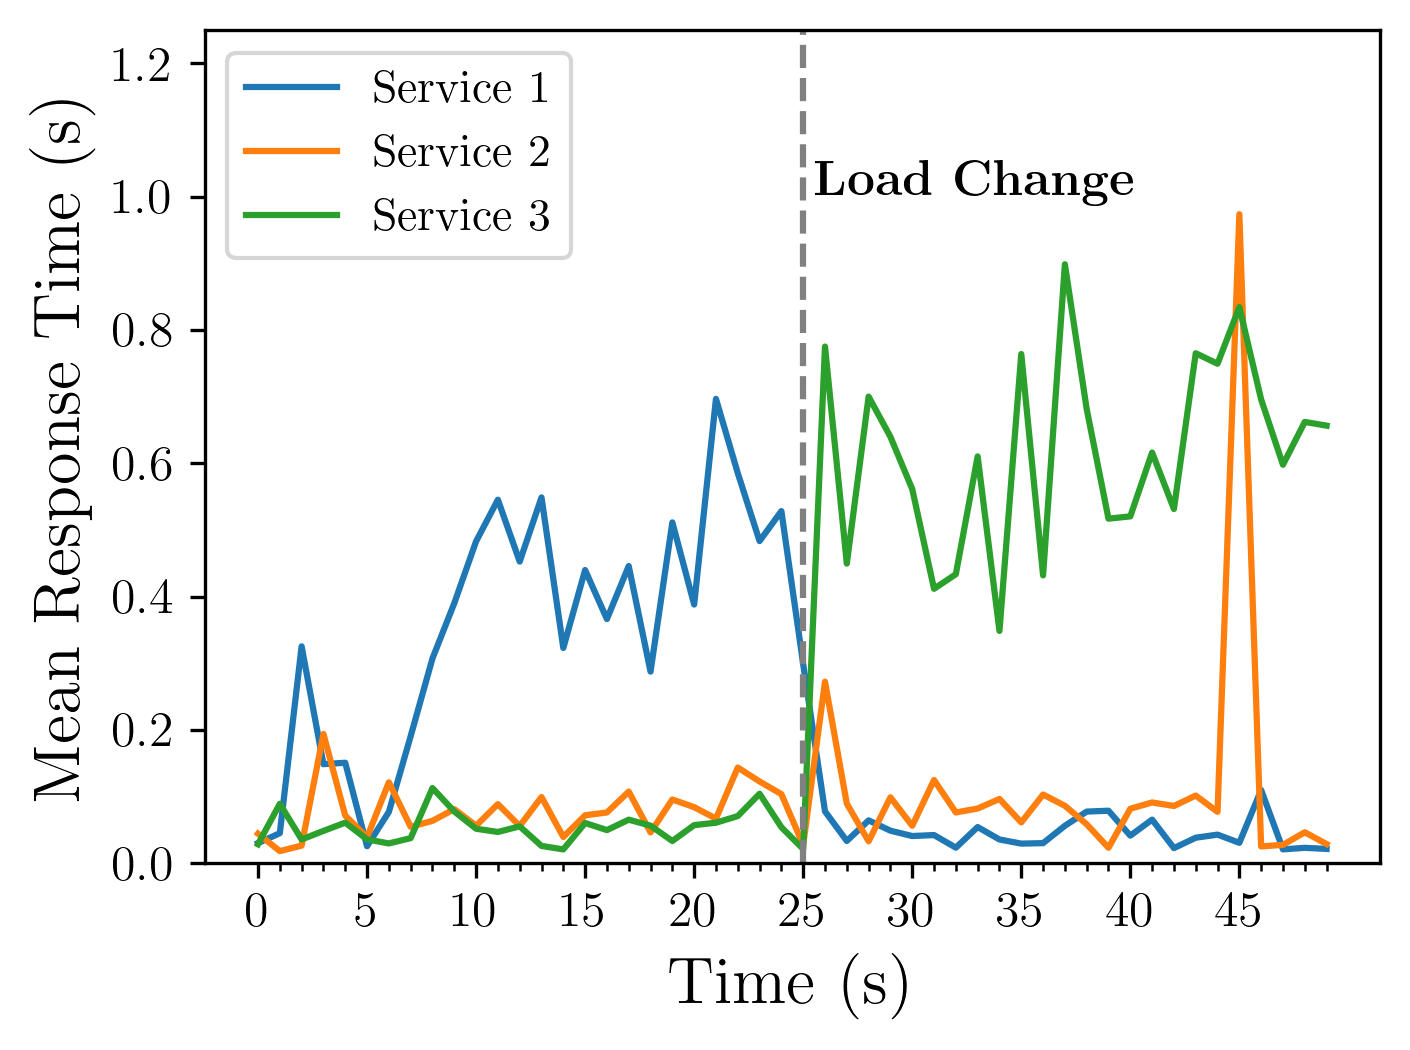

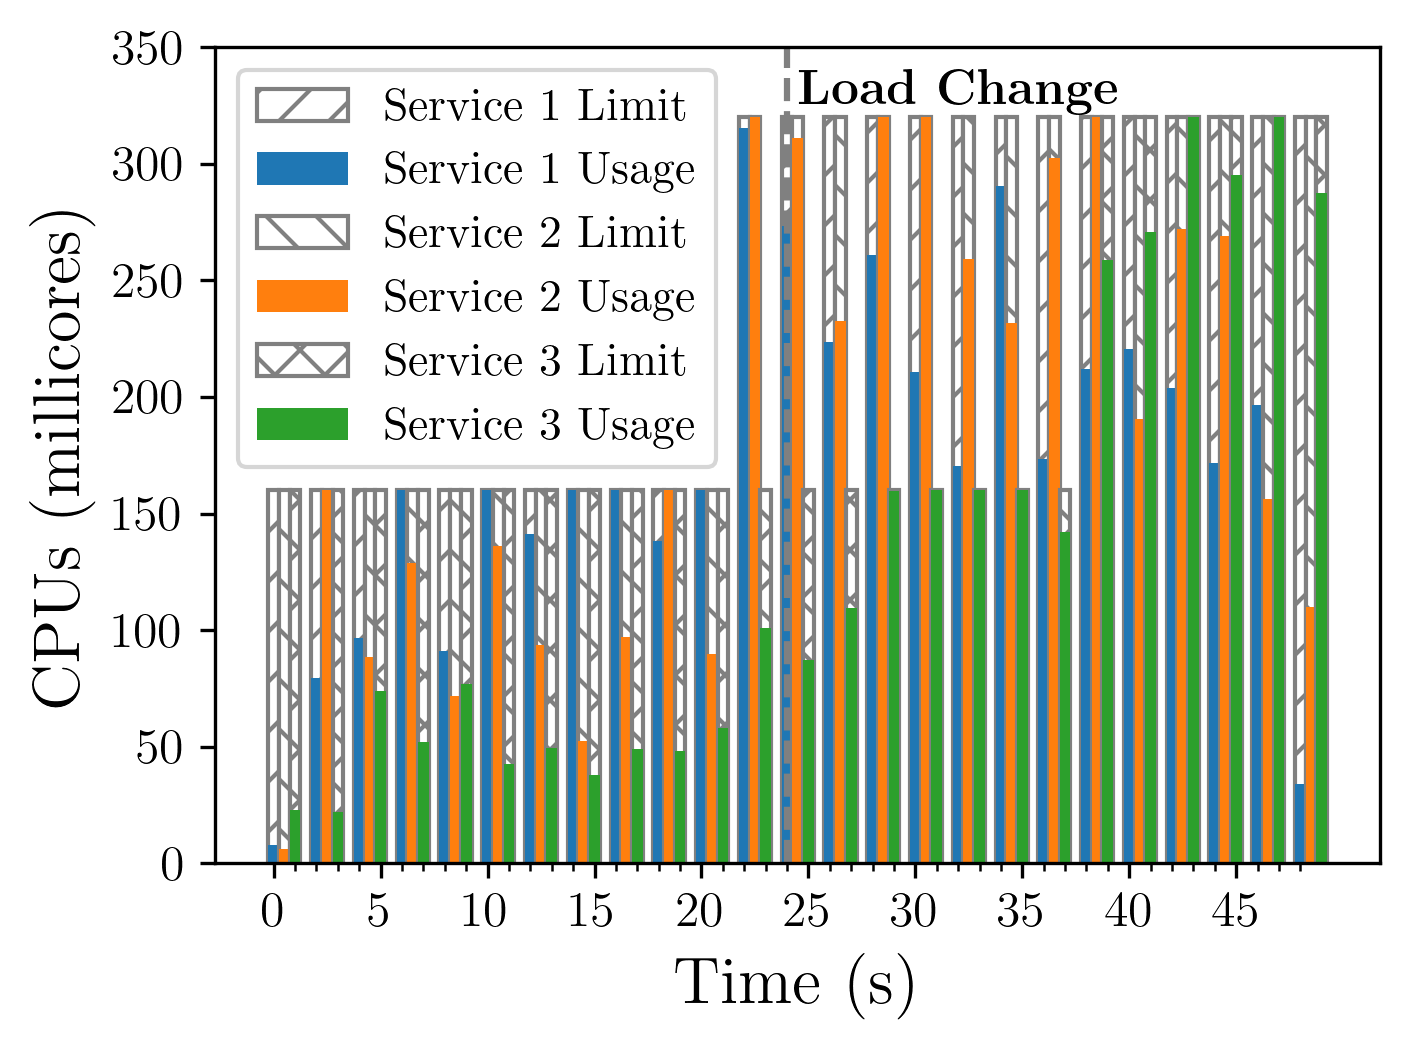

In [74]:

def select_every_n_seconds(data, n):
    return [data[i] for i in range(0, len(data), n)]

# Select container recordings every 2 seconds
time_interval = 2
selected_hpa_container_recordings = select_every_n_seconds(hpa_container_recordings, time_interval)

fig, ax1 = plt.subplots(figsize=(4.8, 3.6), dpi=300)  # Adjusted figure size

# Mean Response Times Plot
time_axis_rts = range(len(hpa_response_times[list(hpa_response_times.keys())[0]]))

for api_id, rts in hpa_response_times.items():
    ax1.plot(time_axis_rts, rts, label=f'Service {api_id}')

# Annotating load change
halfway_point_rts = len(time_axis_rts) // 2
ax1.axvline(halfway_point_rts, color='gray', linestyle='--')
ax1.text(halfway_point_rts + 0.5, 1, r'\noindent\textbf{Load Change}', color='black', fontsize=12)

# Setting labels and title for the first subplot
ax1.set_xlabel('Time (s)', fontsize=16)
ax1.set_ylabel('Mean Response Time (s)', fontsize=16)
# ax1.set_title(f'Native - Mean Response Time', fontsize=12)
ax1.legend(loc='upper left', fontsize=11)
ax1.set_ylim(0, 1.25)

ax1.set_xticks(np.arange(min(time_axis_rts), max(time_axis_rts) + 1, 1), minor=True)  # Tick every 1 unit
ax1.set_xticks(np.arange(min(time_axis_rts), max(time_axis_rts) + 1, 5))  # Tick every 5 units
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=10)

plt.tight_layout()
plt.savefig(f'figures/hpa_response_times.pdf')
plt.show()
plt.close(fig)

fig, ax2 = plt.subplots(figsize=(4.8, 3.6), dpi=300)  # Adjusted figure size
# CPU Allocations and Utilizations Plot
time_axis_crec = range(0, len(selected_hpa_container_recordings) * time_interval, time_interval)
num_services = len(selected_hpa_container_recordings[0])  # Assuming three services

hatches = ['//', '\\\\', 'xx']  # Hatches for allocations
for service_idx in range(num_services):
    # Extracting cpu_limits and cpu_usages for the current service
    cpu_limits = [selected_hpa_container_recordings[t][service_idx][0] for t in range(len(selected_hpa_container_recordings))]
    cpu_usages = [selected_hpa_container_recordings[t][service_idx][1] for t in range(len(selected_hpa_container_recordings))]
    
    # Clip the usage to limits
    cpu_clipped = np.minimum(cpu_usages, cpu_limits)

    # Bar positions
    x_pos = np.array(time_axis_crec) + 0.5 * service_idx
    
    # Plotting CPU limits and usages
    ax2.bar(x_pos, cpu_limits, width=0.5, label=f'Service {service_idx + 1} Limit',
            color='white', edgecolor='gray', hatch=hatches[service_idx])  # CPU limits
    ax2.bar(x_pos, cpu_clipped, width=0.5, label=f'Service {service_idx + 1} Usage')  # CPU usages

# Setting labels and title for the second subplot
ax2.set_xlabel('Time (s)', fontsize=16)
ax2.set_ylabel('CPUs (millicores)', fontsize=16)
# ax2.set_title(f'Native - CPU Allocations and Utilizations', fontsize=12)
ax2.legend(loc='upper left', fontsize=11)
ax2.set_ylim(0, 350)  # Adjust this limit based on your data

halfway_point_crec = len(time_axis_crec) // 2
ax2.axvline(halfway_point_crec * time_interval, color='gray', linestyle='--')
ax2.text(halfway_point_crec * time_interval + 0.5, 325, r'\noindent\textbf{Load Change}', color='black', fontsize=12)

ax2.set_xticks(np.arange(min(time_axis_crec), max(time_axis_crec) + 1, 1), minor=True)  # Tick every 2 units
ax2.set_xticks(np.arange(min(time_axis_crec), max(time_axis_crec) + 1, 5))  # Tick every 10 units
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Ensure integer labels


ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=10)

# Final layout adjustments and saving the plot
plt.tight_layout()
plt.savefig('figures/hpa_utlizations.pdf', bbox_inches='tight')  # Save figure
plt.show()
plt.close(fig)
